# Assessing Fit (Polynomial Regression)

In this notebook we will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a mean to examine this topic. 

**outline for this notebook**
* In this notebook, we will write a function to take a dataframe and a degree. Then, return a dataframe where each column is the dataframe to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the dataframe, column 2 is the dataframe squared and column 3 is the dataframe cubed
* we will use matplotlib to visualise polynomial regressions
* we will use matplotlib to visualise the same polynomial degree on different subsets of the data
* we will use a validation set to select a polynomial degree
* we will assess the final fit using test data

We will continue to use the House data.

## import library

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn import linear_model
import matplotlib.pyplot as plt

## read data in

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
df = pd.read_csv("kc_house_data.csv")
colname_lst = list(df.columns.values)
coltype_lst =  [str, str, float, float, float, float, int, str, int, int, int, int, int, int, int, int, str, float, float, float, float]
col_type_dict = dict(zip(colname_lst, coltype_lst))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In this notebook, we will primarily experiment on "price" and "sqft_living". Therefore, we will sort our data first for latter use. 

In [3]:
data = df.sort(['sqft_living', 'price'], ascending=[1, 0])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000,0,0.00,290,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000,1,0.75,370,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000,1,0.75,380,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000,0,0.75,384,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
21332,9266700190,20150511T000000,245000,1,1.00,390,2000,1,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340,5100


Next we are going to write a polynomial function that takes a dataframe and a maximal degree. Then, returns a dataframe with columns containing the dataframe to all the powers up to the maximal degree.

The easiest way to apply a power to a dataframe is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third power we can do as follows: 

In [4]:
tmp = pd.DataFrame([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

   0
0  1
1  2
2  3
    0
0   1
1   8
2  27


Since the "tmp_cubed" is alrady a dataframe, what we need to do now is to change the column name to be more intuative. In this case, we will name coulumn in accordance with the power it takes.

In [5]:
tmp_cubed.columns = ["power_1"]
tmp_cubed

,power_1
0,1
1,8
2,27


## create polynomial dataframe function

We will use what we have tired above to implement dataframe consisting of the powers of a dataframe up to a specific degree:

In [6]:
def polynomial_dataframe(feature, degree):
    # assume that degree >= 1
    # and set polynomial_df['power_1'] equal to the passed feature
    # use deep copy here. otherwise, it will do shallow copy. 
    polynomial_df = feature.copy(deep=True)
    polynomial_df.columns = ["power_1"]
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign polynomial_df[name] to the appropriate power of feature
            polynomial_df[name]=feature.apply(lambda x: x**power)
    return polynomial_df

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [7]:
tmp

,0
0,1
1,2
2,3


In [8]:
polynomial_dataframe(tmp, 5)

,power_1,power_2,power_3,power_4,power_5
0,1,1,1,1,1
1,2,4,8,16,32
2,3,9,27,81,243


# visualizing polynomial regression degree 1

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [9]:
poly1_data = polynomial_dataframe(pd.DataFrame(data["sqft_living"]), 1)
poly1_data["price"] = data["price"] #add price to the data since it's the target
poly1_data.tail()

,power_1,price
8092,9640,4668000
9254,9890,6885000
3914,10040,7062500
7252,12050,7700000
12777,13540,2280000


Now, let's make the model from sklearn library

In [10]:
# Create linear regression object
regfit = linear_model.LinearRegression(fit_intercept=True)
# Train the model using the training sets
regfit.fit(poly1_data.iloc[:,0].to_frame(), poly1_data.iloc[:,1].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now let's look at the coefficient of our fit

In [11]:
"intercept: ", regfit.intercept_ 

('intercept: ', array([-43580.74309448]))

In [12]:
"coefficients: ", regfit.coef_ 

('coefficients: ', array([[ 280.6235679]]))

Now we will visualise our data against the fitted line from the model we built.

In [13]:
#predict "power_1"
poly1_data["predicted"] = regfit.predict(poly1_data.iloc[:,0].to_frame())

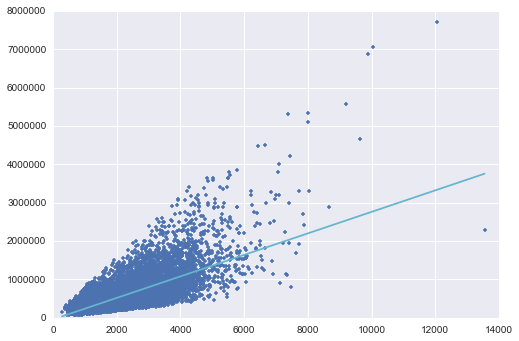

In [14]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'b.',
        poly1_data['power_1'], poly1_data["predicted"],'c-')

Let's unpack that plt.plot() command. The first pair of dataframe we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

# visualizing polynomial regression degree 2

In [15]:
poly2_data = polynomial_dataframe(pd.DataFrame(data["sqft_living"]), 2)
poly2_data.head()

,power_1,power_2
19452,290,84100
15381,370,136900
860,380,144400
18379,384,147456
21332,390,152100


In [16]:
features2 = list(poly2_data.columns.values) # get the name of the features
poly2_data["price"] = data["price"] # add price to the data since it's the target
# Create linear regression object
regfit2 = linear_model.LinearRegression(fit_intercept=True)
#train model
regfit2.fit(poly2_data[features2], poly2_data.iloc[:,(len(poly2_data.columns)-1)].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now let's inspect the coefficients

In [17]:
"intercept: ", regfit2.intercept_ 

('intercept: ', array([ 199222.27930548]))

In [18]:
"coefficients: ", regfit2.coef_ 

('coefficients: ', array([[  6.79940947e+01,   3.85812609e-02]]))

Now we will visualise our data against the fitted line from the model we built.

In [19]:
#let's make the prediction first
poly2_data["predicted"] = regfit2.predict(poly2_data[features2])

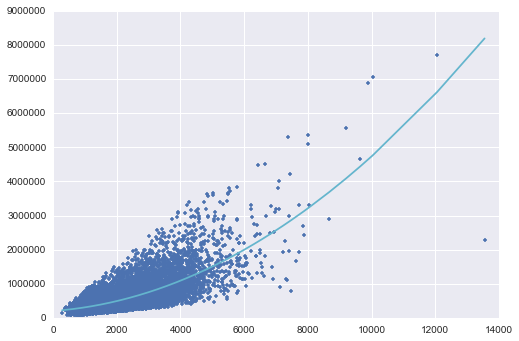

In [20]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'b.',
        poly2_data['power_1'], poly2_data["predicted"],'c-')

The resulting model looks like half a parabola. Let's try and see what the cubic looks like:

# visualizing polynomial regression degree 3

In [21]:
poly3_data = polynomial_dataframe(pd.DataFrame(data["sqft_living"]), 3)
poly3_data.head()

,power_1,power_2,power_3
19452,290,84100,24389000
15381,370,136900,50653000
860,380,144400,54872000
18379,384,147456,56623104
21332,390,152100,59319000


Now, we shall train the model.

In [22]:
features3 = list(poly3_data.columns.values) # get the name of the features
print features3
poly3_data['price'] = data['price'] # add price to the data since it's the target
# Create linear regression object
regfit3 = linear_model.LinearRegression(fit_intercept=True)
#train model
regfit3.fit(poly3_data[features3], poly3_data.iloc[:,(len(poly3_data.columns)-1)].to_frame())

['power_1', 'power_2', 'power_3']


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now we shall make the prediction and plot.

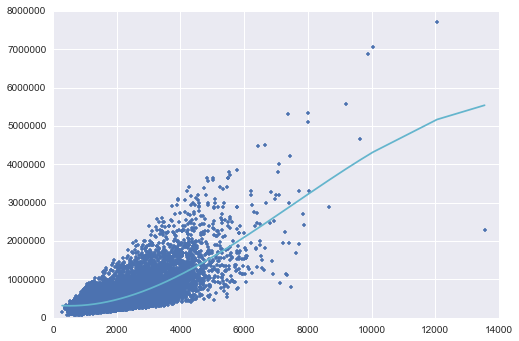

In [23]:
#let's make the prediction first
poly3_data["predicted"] = regfit3.predict(poly3_data[features3])
plt.plot(poly3_data['power_1'],poly3_data['price'],'b.',
        poly3_data['power_1'], poly3_data["predicted"],'c-')

# visualizing polynomial regression degree 15

Now let's try a 15th degree polynomial:

In [24]:
poly15_data = polynomial_dataframe(pd.DataFrame(data["sqft_living"]), 15)
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
21332,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000128,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808


Now, let's train the model.

In [25]:
features15 = list(poly15_data.columns.values) # get the name of the features
print features15
poly15_data['price'] = data['price'] # add price to the data since it's the target
# Create linear regression object
regfit15 = linear_model.LinearRegression(fit_intercept=True)
#train model
regfit15.fit(poly15_data[features15], poly15_data.iloc[:,(len(poly15_data.columns)-1)].to_frame())

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

lét's look at the plot.

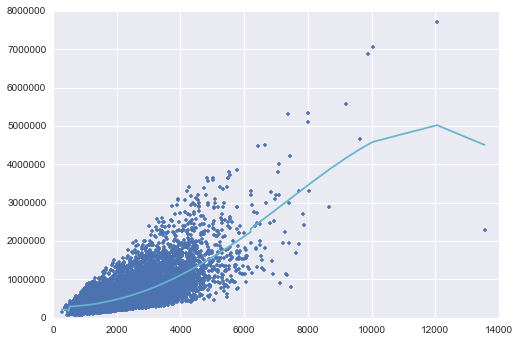

In [26]:
#let's make the prediction first
poly15_data["predicted"] = regfit15.predict(poly15_data[features15])
plt.plot(poly15_data['power_1'],poly15_data['price'],'b.',
        poly15_data['power_1'], poly15_data["predicted"],'c-')

## selecting a polynomial degree

Whenever we have a "magic" parameter like the degree of the polynomial, there is one well-known way to select these parameters: validation set. We can use validation set to help us find what degree is proper for our data set and also help prevent "overfitting" issue. Therefore, in this section, we will use validation set to help us determine the suitable degree and the indicator that use to measure this is Mean Square Error (MSE).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`.
* Further split our training data into two sets: `training` and `validation`. 

In [27]:
idx = np.random.rand(len(data)) < 0.8
train = data[idx]; test = data[~idx]
idx = np.random.rand(len(train)) < 0.8
valid = train[~idx]; train = train[idx]

Next we will write a loop that fit model from degree 1 to 15 and compute the "MSE" and store it to dataframe.

In [28]:
#define an empty dataframe to keep track of MSE
mse_df = pd.DataFrame({"degree":[],"mse":[]})

for degree in range(1, 16):
    poly_data = polynomial_dataframe(pd.DataFrame(train["sqft_living"]), degree)
    features = list(poly_data.columns.values) # get the name of the features
    poly_data["price"] = train["price"] # add price to the data since it's the target
    # Create linear regression object
    regfit = linear_model.LinearRegression(fit_intercept=True)
    #train model
    regfit.fit(poly_data[features], poly_data.iloc[:,(len(poly_data.columns)-1)].to_frame())
    #validate the model
    poly_valid = polynomial_dataframe(pd.DataFrame(valid["sqft_living"]), degree)
    poly_valid["price"] = valid["price"] # add price to the data since it's the target
    poly_valid["predicted"] = regfit.predict(poly_valid[features])
    mse = np.mean((poly_valid["predicted"]- poly_valid["price"])**2)
    mse_df = mse_df.append(pd.DataFrame([[degree, mse]], columns=["degree","mse"]))
# inspect mse
mse_df

,degree,mse
0,1,6.997170e+10
0,2,6.381786e+10
0,3,6.349781e+10
0,4,6.354785e+10
0,5,6.345982e+10
0,6,6.345451e+10
0,7,6.345192e+10
0,8,6.345192e+10
0,9,6.345192e+10
0,10,6.345192e+10


Now let's visualse our MSE

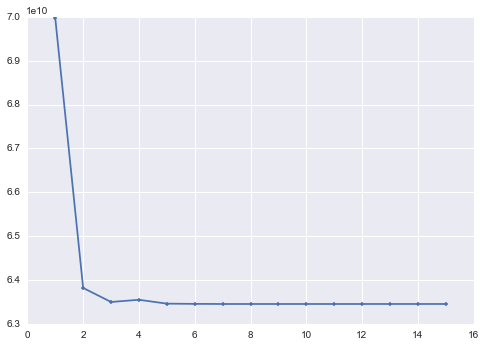

In [29]:
plt.plot(mse_df['degree'],mse_df['mse'],'b.-')

From the visualisation above, we can see that after degree 5 MSE does not significantly decrease. Therefore we would pick degree 5 as our maximum number for polynormial. 

Now that we have chosen the degree of your polynomial using validation data, let's compute the RSS of this model on TEST data.

In [30]:
degree = 5
poly_data = polynomial_dataframe(pd.DataFrame(train["sqft_living"]), degree)
features = list(poly_data.columns.values) # get the name of the features
poly_data["price"] = train["price"] # add price to the data since it's the target
# Create linear regression object
regfit = linear_model.LinearRegression(fit_intercept=True)
#train model
regfit.fit(poly_data[features], poly_data.iloc[:,(len(poly_data.columns)-1)].to_frame())
#test the model
poly_test = polynomial_dataframe(pd.DataFrame(test["sqft_living"]), degree)
poly_test["price"] = test["price"] # add price to the data since it's the target
poly_test["predicted"] = regfit.predict(poly_test[features])
mse = np.mean((poly_test["predicted"]- poly_test["price"])**2)
mse

61167415314.65606

*last edit 27/10/2016*